# House Hold Energy Data - Time Series

## Data Loading and Exploration

In [1]:
import kaggle

## Make sure that kaggle.json is in C:\Users\<username>\.kaggle
# kaggle.api.authenticate()

path = "../datasets/vitthalmadane/energy-consumption-time-series-dataset"

# kaggle.api.dataset_download_files('vitthalmadane/energy-consumption-time-series-dataset', path=path, unzip=True)

In [2]:
import pandas as pd
import os

## set path to first file
files = os.listdir(path)
file_one = os.path.join(path, files[0])

## read csv and combine date and time columns
data = pd.read_csv(file_one)

data['datetime'] = pd.to_datetime(data['TxnDate'] + ' ' + data['TxnTime'])

data = data.drop(["Unnamed: 0", "TxnTime", "TxnDate"], axis = 1)

data = data.sort_values(by="datetime").set_index("datetime")

data.head()

,Consumption
datetime,
2022-01-01 00:22:28,1.030
2022-01-01 00:42:33,0.904
2022-01-01 01:01:51,0.904
2022-01-01 01:41:48,1.850
2022-01-01 02:22:52,1.878


In [3]:
## check for null values

pd.isnull(data).sum()

Consumption    0
dtype: int64

<strong>No null values</strong>

In [17]:
import matplotlib.pyplot as plt

def plot_hist(data):
  # Plot the histogram
  plt.figure(figsize=(8, 6))
  plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

  # Add titles and labels
  plt.title('Distribution of Consumption', fontsize=16)
  plt.xlabel('Consumption', fontsize=14)
  plt.ylabel('Frequency', fontsize=14)

  # Show grid for better readability
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Display the plot
  plt.tight_layout()
  plt.show()

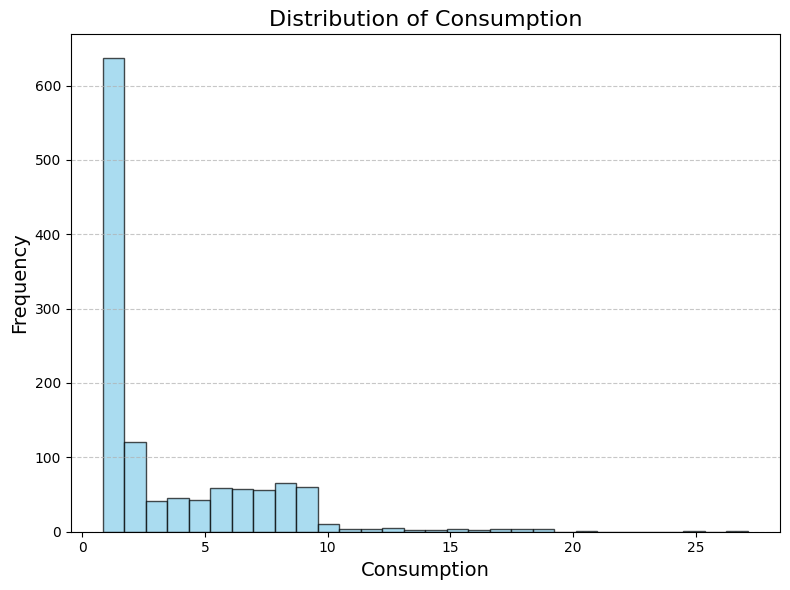

In [18]:
plot_hist(data['Consumption'])

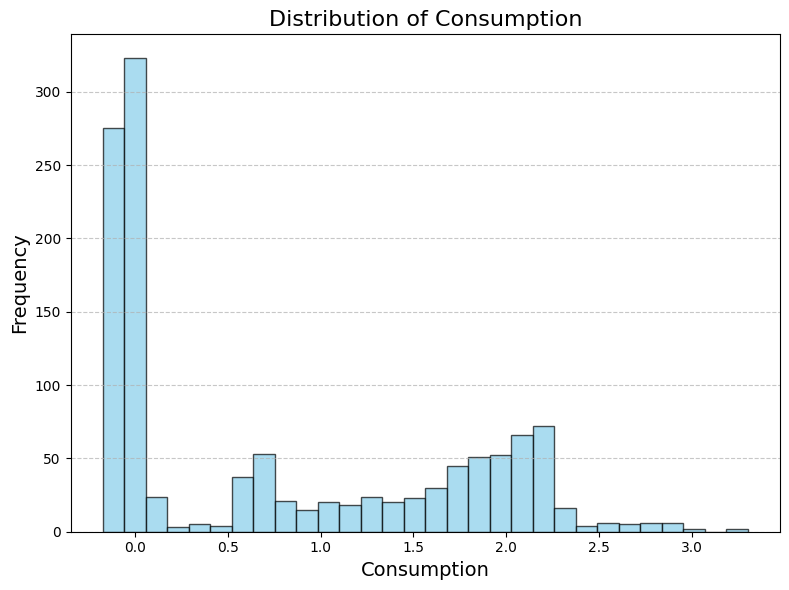

In [19]:
import numpy as np

# Apply log transformation to the 'Consumption' column
data['log_Consumption'] = np.log(data['Consumption'])

# Plot or check the distribution before and after
plot_hist(data['log_Consumption'])

<strong>right skew data</strong>

In [21]:
import plotly.graph_objects as go

def plot_data_interactive(x, y):
    # Create an interactive time series plot
    fig = go.Figure()

    # Add a line trace for Consumption
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        line=dict(color='blue'),
        marker=dict(size=5),
        name='Consumption'
    ))

    # Add titles and labels
    fig.update_layout(
        title='Interactive Time Series of Consumption',
        xaxis_title='Datetime',
        yaxis_title='Consumption',
        template='plotly_white',
        xaxis=dict(rangeslider=dict(visible=True)),  # Enable zoom slider
        yaxis=dict(fixedrange=False)  # Allow zoom on the y-axis
    )

    # Show the plot
    fig.show()


In [ ]:
## plot pre-interpolated data

plot_data_interactive(data.index, data['Consumption'])

In [23]:
## function for interpolation
## default to linear interpolation
def interpolate(data, resolution, interploation = "linear"):
  return data.resample(resolution).sum().interpolate(interploation)

## sample interpolation for getting mean of every 15 minutes
int_data = interpolate(data, "15min")

int_data.head()

,Consumption,log_Consumption
datetime,,
2022-01-01 00:15:00,1.030,0.029559
2022-01-01 00:30:00,0.904,-0.100926
2022-01-01 00:45:00,0.000,0.000000
2022-01-01 01:00:00,0.904,-0.100926
2022-01-01 01:15:00,0.000,0.000000


In [27]:
## plot interpolated data

plot_data_interactive(data.index, data['log_Consumption'])

<strong>To reverse log transformaton</strong> which is important for interpreting machine learning predicitons


<i>np.exp(data['log_Consumption'])</i>

## Data Cleaning